In [1]:
import numpy as np
import jax
import jax.numpy as jnp
from jax import lax
import itertools
from typing import Callable, Optional, Sequence, Tuple

In [2]:
import pandas as pd

In [96]:
# Read the CSV file
#data = pd.read_csv('ferminet_2025_07_10_17:33:46/train_stats.csv')
data = pd.read_csv('ferminet_2025_08_10_08:41:35/train_stats.csv')

In [97]:
data.iloc[:,1].shape[0]

36449

In [98]:
data

,step,energy,ewmean,ewvar,pmove
0,0,38.487644,38.487644,0.000000,0.927148
1,1,36.145730,38.253452,0.493611,0.928223
2,2,35.431630,37.971270,1.160891,0.929785
3,3,34.896004,37.663746,1.895957,0.933203
4,4,31.988560,37.096226,4.605058,0.933496
...,...,...,...,...,...
36444,36444,14.909534,14.882400,0.002721,0.528613
36445,36445,14.947465,14.888906,0.002830,0.539258
36446,36446,14.932592,14.893275,0.002718,0.537793
36447,36447,14.905933,14.894541,0.002461,0.545020


In [99]:
average = data.iloc[-5000:,1].mean()  # Access the second column by index (1)
print(average)

14.8833645797


In [85]:
#exact : 21.94179407979651 

In [86]:
17.75887446- 0.052428256351407396

17.706446203648593

In [87]:
std_dev = data.iloc[-100:, 1].std()  # Access the first column by index (0)
print(std_dev)

0.003164190070968534


In [88]:
22.01447906570605 - 0.048898987988330325

21.965580077717718

In [89]:
average = data.iloc[-500:, 1].mean()  # Access the second column by index (1)
print(average)

5.5794944774


In [90]:
std_dev = data.iloc[-1000:, 1].std()  # Access the first column by index (0)
print(std_dev)

0.003406061460347816


In [91]:
std_dev = data.iloc[-100:, 1].std()  # Access the first column by index (0)
print(std_dev)

0.003164190070968534


In [92]:
#exact energy (3 particles in 3x3)
880.9929063138561
#exact energy (4 particles in 3x3)
1230.9539426903016
#exact energy (2 particles in 3x3) with no complex term
588.4067516476963

588.4067516476963

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


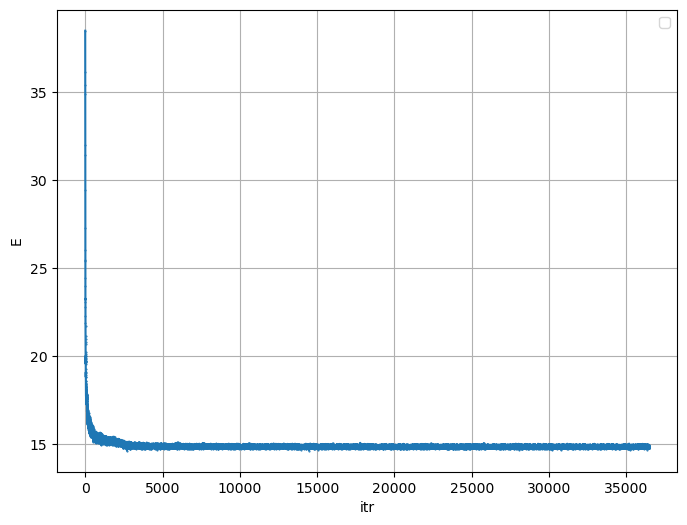

In [100]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `data` is a Pandas DataFrame
x = data.iloc[:, 0]  # First column (iterations)
y = data.iloc[:, 1]  # Second column (values)

# Compute the moving average (cumulative average)
#y_moving_avg = y.expanding().mean()

# Plot x vs moving average of y
plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='o', linestyle='-', markersize=0.5)
plt.xlabel('itr')
plt.ylabel('E')
#plt.axhline(y=17.756487779528502 , color='red', linestyle='--')
#plt.axhline(y=21.94179407979651 , color='red', linestyle='--')
#plt.xlim(6000,10000)
#plt.ylim(21.8,22.6)
plt.grid(True)
plt.legend()
plt.show()

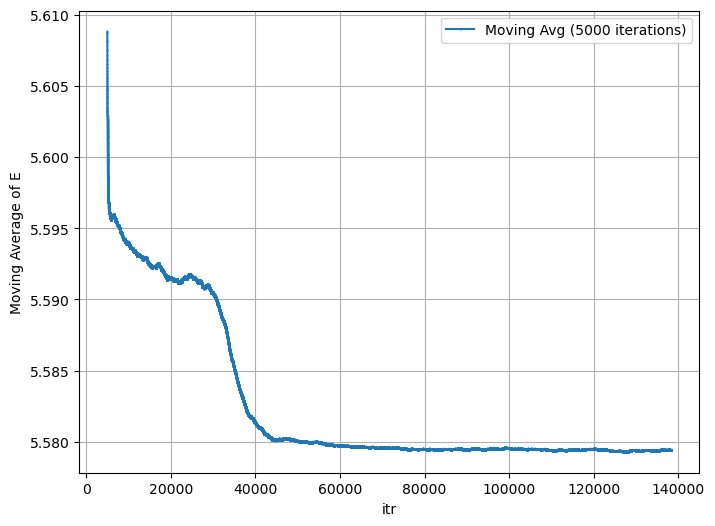

In [94]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `data` is a Pandas DataFrame
x = data.iloc[:, 0]  # First column (iterations)
y = data.iloc[:, 1]  # Second column (values)

# Compute the moving average over the last 100 iterations
y_moving_avg = y.rolling(window=5000).mean()

# Plot x vs moving average of y
plt.figure(figsize=(8, 6))
plt.plot(x, y_moving_avg, marker='o', linestyle='-', markersize=0.5, label='Moving Avg (5000 iterations)')
#plt.axhline(y=21.94179407905313, color='red', linestyle='--')
#plt.axhline(y=21.94179407979651 , color='red', linestyle='--')
#plt.axhline(y=17.756487779528502 , color='red', linestyle='--')
plt.xlabel('itr')
plt.ylabel('Moving Average of E')
plt.grid(True)
#plt.xlim(60000,100000)
#plt.ylim(17.7,17.9)
plt.legend()
plt.show()


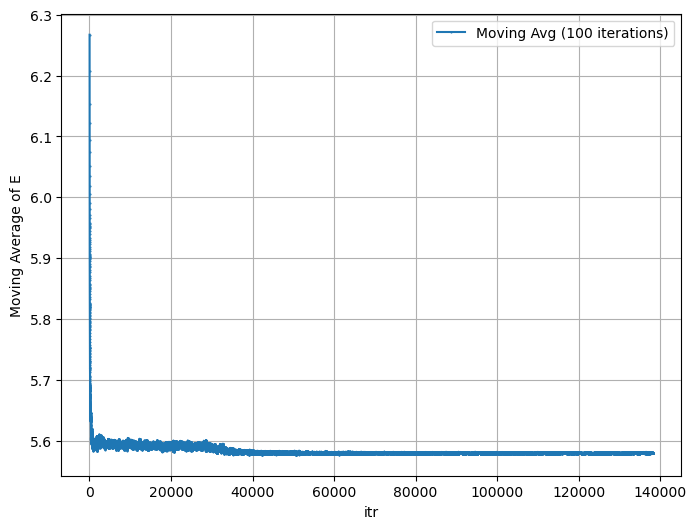

In [95]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `data` is a Pandas DataFrame
x = data.iloc[:, 0]  # First column (iterations)
y = data.iloc[:, 1]  # Second column (values)

# Compute the moving average over the last 100 iterations
y_moving_avg = y.rolling(window=50).mean()

# Plot x vs moving average of y
plt.figure(figsize=(8, 6))
plt.plot(x, y_moving_avg, marker='o', linestyle='-', markersize=0.5, label='Moving Avg (100 iterations)')
#plt.axhline(y=588.4067516476963, color='red', linestyle='--')
plt.xlabel('itr')
plt.ylabel('Moving Average of E')
plt.grid(True)
plt.legend()
plt.show()

In [57]:
ckpt_data = np.load('/home/ahmed95/ferminet_ahmed/ferminet_2025_08_05_18:26:25/qmcjax_ckpt_095234.npz', allow_pickle=True)
print(list(ckpt_data.keys()))
data = ckpt_data['data'].item()
print(list(data.keys()))

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


['t', 'data', 'params', 'opt_state', 'mcmc_width', 'density_state']
['positions', 'spins', 'atoms', 'charges']


In [58]:
ckpt_data['density_state'].item()

In [59]:
ckpt_data['params'].item()

{'envelope': [{}],
 'layers': {'attention': [{'attn_output': Array([[[-0.03572021,  0.0225971 ,  0.10821283, ...,  0.0364782 ,
             -0.01380118, -0.08352044],
            [ 0.00862458,  0.00889162, -0.04595638, ..., -0.00619735,
              0.06330299,  0.05514231],
            [ 0.02211365, -0.1132652 , -0.13983905, ..., -0.03021252,
             -0.06259821,  0.0056924 ],
            ...,
            [ 0.0536028 ,  0.03249205, -0.11915967, ...,  0.07210281,
             -0.06568836,  0.09214292],
            [-0.01988611, -0.02472734, -0.06185533, ...,  0.03422056,
             -0.03395534, -0.08751828],
            [-0.02789589,  0.00028924, -0.030569  , ..., -0.07057852,
              0.02940861, -0.07694897]]], dtype=float32),
    'k_w': Array([[[ 0.01984158, -0.05199475, -0.03726373, ..., -0.03611427,
             -0.10880398,  0.08124198],
            [-0.130692  ,  0.00546436, -0.03841429, ...,  0.02363629,
              0.09030353, -0.06949861],
            [ 0.07655

In [60]:
positions = ckpt_data['data'].item()["positions"]

In [61]:
positions[0].shape

(1024, 6)

In [62]:
def lattice_vecs(a1:jnp.ndarray, a2:jnp.ndarray,Tmatrix:jnp.ndarray) -> np.ndarray:
  "Return the basis T1,T2 of the super-cell built from the unit cell lattice vectors a1 and a2"
  T1 = Tmatrix[0,0]*a1 + Tmatrix[0,1]*a2
  T2 = Tmatrix[1,0]*a1 + Tmatrix[1,1]*a2
  return jnp.column_stack([T1, T2])
def reciprocal_vecs(a1: jnp.ndarray, a2: jnp.ndarray, Tmatrix: jnp.ndarray) -> jnp.ndarray:
  """
  Return the reciprocal basis vectors g1, g2 such that T_i · g_j = 2π δ_ij,
  where T1, T2 are the supercell vectors built from the unit cell vectors a1 and a2.
  """
  # Construct supercell lattice vectors T1, T2
  T1 = Tmatrix[0,0] * a1 + Tmatrix[0,1] * a2
  T2 = Tmatrix[1,0] * a1 + Tmatrix[1,1] * a2

  # Compute the oriented area A = T1 x T2 (scalar in 2D)
  A = T1[0] * T2[1] - T1[1] * T2[0]

  # Compute reciprocal vectors satisfying T_i · g_j = 2π δ_ij
  g1 = 2 * jnp.pi / A * jnp.array([ T2[1], -T2[0] ])
  g2 = 2 * jnp.pi / A * jnp.array([ -T1[1], T1[0] ])

  return jnp.column_stack([g1, g2])

In [63]:
a1 = jnp.array([jnp.sqrt(3)/2,-0.5])
a2 =   jnp.array([0,1])
Tmatrix = jnp.array([[3,0], [0, 3]])  # Identity matrix for unit cell
latticevecs = lattice_vecs(a1, a2, Tmatrix)
unitcellvecs = lattice_vecs(a1, a2, jnp.array([[1,0], [0, 1]]))  

In [64]:
def map_to_supercell(positions, lattice_vectors):
    """
    Maps flattened positions back to the supercell for a general lattice (e.g., triangular).

    Args:
        positions (np.ndarray): Flattened positions of shape (6,) for 3 particles (x1, y1, x2, y2, x3, y3).
        lattice_vectors (np.ndarray): 2x2 array representing the supercell lattice vectors.

    Returns:
        np.ndarray: Positions mapped back to the supercell, shape (3, 2).
    """
    # Reshape positions into (num_particles, 2)
    num_particles = len(positions) // 2
    reshaped_positions = positions.reshape((num_particles, 2))
    
    # Compute the inverse of the lattice vectors
    lattice_inverse = np.linalg.inv(lattice_vectors)
    
    # Convert positions to fractional coordinates
    fractional_coords = np.dot(reshaped_positions, lattice_inverse.T)
    # Map fractional coordinates back to the unit cell (0 to 1)
    fractional_coords = np.mod(fractional_coords, 1.0)
    # Convert back to Cartesian coordinates
    supercell_positions = np.dot(fractional_coords, lattice_vectors.T) 
    
    return supercell_positions

def plot_density_with_unit_cells(samples, supercell_vectors, unit_cell_vectors, bins=100):
    """
    Plots the density based on the mapped positions and overlays parallelograms for the supercell and a smaller unit cell.

    Args:
        samples (np.ndarray): Array of shape (1, 1024, 6), containing flattened positions for all samples.
        supercell_vectors (np.ndarray): 2x2 array representing the supercell lattice vectors.
        unit_cell_vectors (np.ndarray): 2x2 array representing the smaller unit cell lattice vectors.
        bins (int): Number of bins for the 2D histogram.
    """
    # Ensure samples is of shape (1, 1024, 6)
   # assert samples.shape[0] == 1 and samples.shape[2] == 6, "Samples must have shape (1, 1024, 6)"
    
    # Extract the 1024 samples
    samples = samples[0]  # Shape becomes (1024, 6)
    
    # Map all samples to the supercell
    mapped_positions = []
    for sample in samples:
        mapped_positions.append(map_to_supercell(sample, supercell_vectors))
    mapped_positions = np.vstack(mapped_positions)  # Combine all samples into one array
    
    # Create a 2D histogram for density
    x, y = mapped_positions[:, 0], mapped_positions[:, 1]
    
    # Define the supercell bounds
    supercell_v1 = supercell_vectors[:,0]
    supercell_v2 = supercell_vectors[:,1]
    supercell_vertices = np.array([[0, 0], supercell_v1, supercell_v1 + supercell_v2, supercell_v2])  # Vertices of the supercell
    x_min, x_max = np.min(supercell_vertices[:, 0]), np.max(supercell_vertices[:, 0])
    y_min, y_max = np.min(supercell_vertices[:, 1]), np.max(supercell_vertices[:, 1])
    
    # Compute the histogram within the supercell bounds
    density, xedges, yedges = np.histogram2d(
        x, y, bins=bins, range=[[x_min, x_max], [y_min, y_max]]
    )
    
    # Plot the density
    plt.figure(figsize=(8, 6))
    plt.imshow(
        density.T,
        origin='lower',
        extent=[x_min, x_max, y_min, y_max],
        aspect='auto',
        cmap='plasma',
    )
    plt.colorbar(label='Density')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Density Plot with Supercell and Unit Cell Parallelograms')
    
    # Overlay the supercell parallelogram
    supercell_parallelogram = np.array([[0, 0], supercell_v1, supercell_v1 + supercell_v2, supercell_v2, [0, 0]])  # Close the supercell
    plt.plot(supercell_parallelogram[:, 0], supercell_parallelogram[:, 1], color='red', label='Supercell')
    
    # Overlay the unit cell parallelogram
    unit_cell_v1 = unit_cell_vectors[:,0]
    unit_cell_v2 = unit_cell_vectors[:,1]
    unit_cell_parallelogram = np.array([[0, 0], unit_cell_v1, unit_cell_v1 + unit_cell_v2, unit_cell_v2, [0, 0]])  # Close the unit cell
    plt.plot(unit_cell_parallelogram[:, 0], unit_cell_parallelogram[:, 1], color='blue', linestyle='--', label='Unit Cell')
    
    # Add a legend for the parallelograms
    plt.legend()
    
    plt.show()
def plot_density_with_circular_bins(samples, supercell_vectors, unit_cell_vectors, bins=100):
    """
    Plots the density based on the mapped positions using circular bins and overlays parallelograms for the supercell and a smaller unit cell.

    Args:
        samples (np.ndarray): Array of shape (1, 1024, 6), containing flattened positions for all samples.
        supercell_vectors (np.ndarray): 2x2 array representing the supercell lattice vectors.
        unit_cell_vectors (np.ndarray): 2x2 array representing the smaller unit cell lattice vectors.
        bins (int): Number of circular bins for the radial density.
    """
    # Extract the 1024 samples
    samples = samples[0]  # Shape becomes (1024, 6)
    
    # Map all samples to the supercell
    mapped_positions = []
    for sample in samples:
        mapped_positions.append(map_to_supercell(sample, supercell_vectors))
    mapped_positions = np.vstack(mapped_positions)  # Combine all samples into one array
    
    # Compute the radial distance of each point from the origin
    radial_distances = np.linalg.norm(mapped_positions, axis=1)
    
    # Define the maximum radius (diagonal of the supercell)
    supercell_v1 = supercell_vectors[:,0]
    supercell_v2 = supercell_vectors[:,1]
    max_radius = np.linalg.norm(supercell_v1 + supercell_v2)
    
    # Compute the histogram for radial density
    density, bin_edges = np.histogram(radial_distances, bins=bins, range=(0, max_radius))
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    
    # Normalize the density by the area of each circular bin
    bin_areas = np.pi * (bin_edges[1:]**2 - bin_edges[:-1]**2)
    normalized_density = density / bin_areas
    
    """# Plot the radial density
    plt.figure(figsize=(8, 6))
    plt.plot(bin_centers, normalized_density, label='Radial Density', color='purple')
    plt.xlabel('Radius')
    plt.ylabel('Density')
    plt.title('Radial Density with Circular Bins')
    plt.grid(True)
    plt.legend()"""
    
    # Overlay the supercell and unit cell parallelograms
    plt.figure(figsize=(8, 6))
    x, y = mapped_positions[:, 0], mapped_positions[:, 1]
    plt.scatter(x, y, s=1, alpha=0.5, label='Mapped Positions')
    
    # Overlay the supercell parallelogram
    supercell_vertices = np.array([[0, 0], supercell_v1, supercell_v1 + supercell_v2, supercell_v2, [0, 0]])  # Close the supercell
    plt.plot(supercell_vertices[:, 0], supercell_vertices[:, 1], color='red', label='Supercell')
    
    # Overlay the unit cell parallelogram
    unit_cell_v1 = unit_cell_vectors[0]
    unit_cell_v2 = unit_cell_vectors[1]
    unit_cell_parallelogram = np.array([[0, 0], unit_cell_v1, unit_cell_v1 + unit_cell_v2, unit_cell_v2, [0, 0]])  # Close the unit cell
    plt.plot(unit_cell_parallelogram[:, 0], unit_cell_parallelogram[:, 1], color='blue', linestyle='--', label='Unit Cell')
    
    plt.axis('equal')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Mapped Positions with Supercell and Unit Cell')
    plt.legend()
    plt.show()

def plot_density_outside_supercell(samples, supercell_vectors, unit_cell_vectors, bins=100, replication_range=1):
    """
    Plots the density based on the mapped positions outside the supercell by replicating the data using periodicity.

    Args:
        samples (np.ndarray): Array of shape (1, 1024, 6), containing flattened positions for all samples.
        supercell_vectors (np.ndarray): 2x2 array representing the supercell lattice vectors.
        unit_cell_vectors (np.ndarray): 2x2 array representing the smaller unit cell lattice vectors.
        bins (int): Number of circular bins for the radial density.
        replication_range (int): Number of replications in each direction (positive and negative) for periodicity.
    """
    # Extract the 1024 samples
    samples = samples[0]  # Shape becomes (1024, 6)
    
    # Map all samples to the supercell
    mapped_positions = []
    for sample in samples:
        mapped_positions.append(map_to_supercell(sample, supercell_vectors))
    mapped_positions = np.vstack(mapped_positions)  # Combine all samples into one array
    
    # Generate replicated positions outside the supercell
    replicated_positions = []
    for i in range(-replication_range, replication_range + 1):
        for j in range(-replication_range, replication_range + 1):
            shift = i * supercell_vectors[:,0] + j * supercell_vectors[:,1]
            replicated_positions.append(mapped_positions + shift)
    replicated_positions = np.vstack(replicated_positions)  # Combine all replicated positions
    
    # Compute the radial distance of each point from the origin
    radial_distances = np.linalg.norm(replicated_positions, axis=1)
    
    # Define the maximum radius (diagonal of the supercell)
    supercell_v1 = supercell_vectors[:,0]
    supercell_v2 = supercell_vectors[:,1]
    max_radius = np.linalg.norm(supercell_v1 + supercell_v2) * replication_range
    
    # Compute the histogram for radial density
    density, bin_edges = np.histogram(radial_distances, bins=bins, range=(0, max_radius))
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    
    # Normalize the density by the area of each circular bin
    bin_areas = np.pi * (bin_edges[1:]**2 - bin_edges[:-1]**2)
    normalized_density = density / bin_areas
    
    # Overlay the replicated positions and supercell
    plt.figure(figsize=(8, 6))
    x, y = replicated_positions[:, 0], replicated_positions[:, 1]
    plt.scatter(x, y, s=1, alpha=0.5, label='Positions')
    
    # Overlay the supercell parallelogram
    supercell_vertices = np.array([[0, 0], supercell_v1, supercell_v1 + supercell_v2, supercell_v2, [0, 0]])  # Close the supercell
    plt.plot(supercell_vertices[:, 0], supercell_vertices[:, 1], color='red', label='Supercell')
    
    # Overlay the unit cell parallelogram
    unit_cell_v1 = unit_cell_vectors[:,0]
    unit_cell_v2 = unit_cell_vectors[:,1]
    unit_cell_parallelogram = np.array([[0, 0], unit_cell_v1, unit_cell_v1 + unit_cell_v2, unit_cell_v2, [0, 0]])  # Close the unit cell
    plt.plot(unit_cell_parallelogram[:, 0], unit_cell_parallelogram[:, 1], color='blue', linestyle='--', label='Unit Cell')
    
    # Set aspect ratio to 1
    plt.axis('equal')
    plt.ylim(-3,4)
    plt.xlim(-1,3)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Positions')
    plt.legend()
    plt.show()


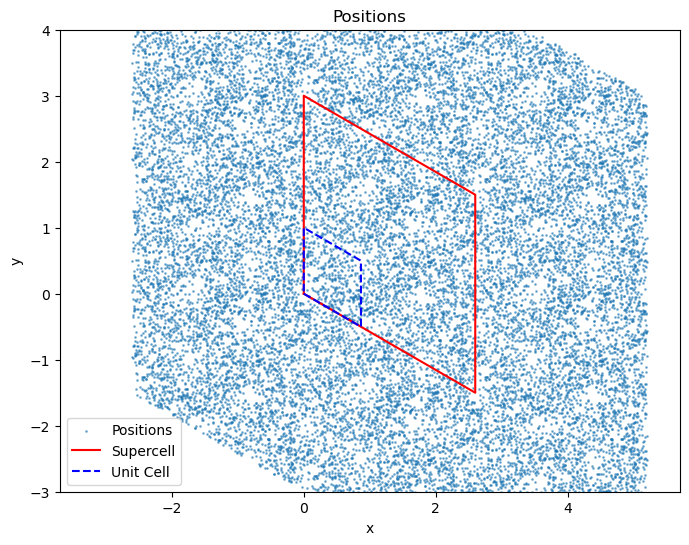

In [65]:
# Example lattice vectors (orthogonal supercell)
#lattice_vectors = np.array([[10.0, 0.0], [0.0, 10.0]])

# Example samples of shape (1, 1024, 6)
#samples = np.random.uniform(0, 30, size=(1, 1024, 6))  # Random example data

# Plot the density
plot_density_outside_supercell(positions, latticevecs,unitcellvecs,40,1)

In [68]:
import numpy as np

def compute_density_delta_product(samples, point, bandwidth=1.0, lattice_vectors=None):
    """
    Compute the real-space density at a single point from samples of positions
    using a product of delta function approximations for each coordinate.

    Parameters:
        samples (np.ndarray): Array of shape (N, N_p, ndim) where N is the number of samples,
                              N_p is the number of particles per sample, and ndim is the dimensionality.
        point (np.ndarray): Array of shape (ndim,) representing the point where density is computed.
        bandwidth (float): Bandwidth parameter for the Gaussian kernel (delta function approximation).
        lattice_vectors (np.ndarray): 2x2 array representing the supercell lattice vectors.

    Returns:
        float: The computed density at the given point.
    """
    samples = np.asarray(samples)
    point = np.asarray(point)
    
    # Ensure the dimensions match
    if samples.shape[2] != point.shape[0]:
        raise ValueError("Dimensionality of samples and point must match.")
    
    # Map samples and point into the supercell if lattice_vectors are provided
    if lattice_vectors is not None:
        mapped_samples = np.zeros_like(samples)  # Create a new array for mapped positions
        for i in range(samples.shape[0]):  # Iterate over all samples
            for j in range(samples.shape[1]):  # Iterate over all particles
                # Flatten particle position and map to supercell
                mapped_samples[i, j] = map_to_supercell(samples[i, j].flatten(), lattice_vectors)
        samples = mapped_samples  # Replace samples with the mapped version
        # Map the point to the supercell
        point = map_to_supercell(point.flatten(), lattice_vectors)
    
    # Compute the Gaussian approximation to the delta function for each coordinate
    deltas = np.exp(-((samples - point) ** 2) / (2 * bandwidth ** 2))
    
    # Take the product across all dimensions for each particle
    delta_products = np.prod(deltas, axis=2)  # Shape: (N, N_p)
    
    # Sum over all particles and samples
    total_density = np.sum(delta_products)
    
    # Normalize by the bandwidth, number of particles, and number of samples
    normalization = (samples.shape[0] * samples.shape[1] * (bandwidth ** samples.shape[2]) * (2 * np.pi) ** (samples.shape[2] / 2))
    density = total_density / normalization
    
    return density

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


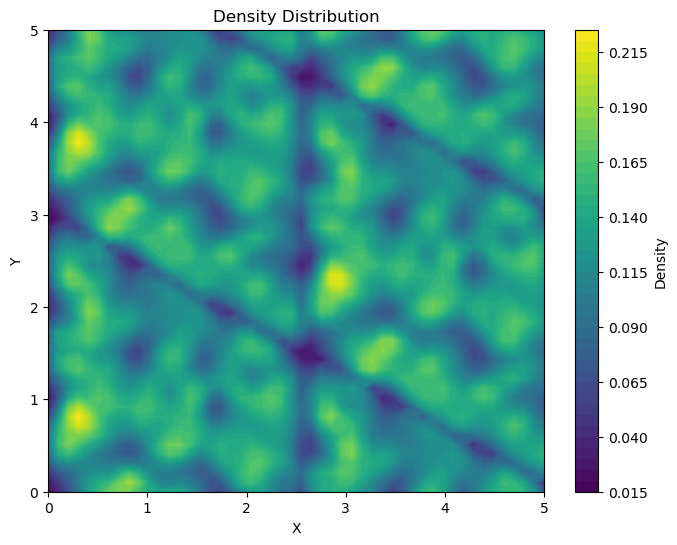

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp

# Define the grid for the 2D space
x_min, x_max = 0.0, 5.0  # Define the range for x-axis
y_min, y_max = 0.0, 5.0  # Define the range for y-axis
grid_size = 50  # Number of points along each axis

x = np.linspace(x_min, x_max, grid_size)
y = np.linspace(y_min, y_max, grid_size)
X, Y = np.meshgrid(x, y)  # Create a 2D grid

# Compute the density at each grid point
density = np.zeros_like(X)
for i in range(grid_size):
    print(i)
    for j in range(grid_size):
        point = jnp.array([X[i, j], Y[i, j]])
        density[i, j] = compute_density_delta_product(reshapedpos, point, 0.1, latticevecs)

# Plot the density as a 2D heatmap
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, density, levels=50, cmap='viridis')
plt.colorbar(label='Density')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Density Distribution')
plt.show()

In [111]:
reshapedpos = positions[0].reshape((positions[0].shape[0], 3, 2))

In [122]:
nk = compute_momentum_distribution(reshapedpos, jnp.array([0,0]), latticevecs)
print(nk)

0.3849001834245888


In [132]:
from ferminet import psiformer

AttributeError: module 'jax.numpy' has no attribute 'DeviceArray'

In [255]:
import numpy as np
import matplotlib.pyplot as plt

def compute_pair_correlation_supercell(positions, supercell_vectors, bins=100, max_distance=None):
    """
    Compute the pair correlation function for particles in a supercell.

    Parameters:
    - positions: Array of shape (n_particles, 2) containing particle positions in Cartesian coordinates.
    - supercell_vectors: Array of shape (2, 2) defining the supercell lattice vectors.
    - bins: Number of bins for the histogram.
    - max_distance: Maximum distance to consider for the pair correlation function.

    Returns:
    - r: Array of bin centers.
    - g_r: Pair correlation function values.
    """
    N = len(positions)  # Number of particles
    v1, v2 = supercell_vectors  # Supercell lattice vectors
    supercell_area = np.abs(np.cross(v1, v2))  # Area of the supercell
    density = N / supercell_area  # Particle density

    # Compute the inverse lattice vectors for periodic boundary conditions
    inv_lattice = np.linalg.inv(supercell_vectors)

    if max_distance is None:
        max_distance = 0.5 * np.sqrt(supercell_area)

    # Map all particle positions back to the supercell
    fractional_coords = np.dot(positions, inv_lattice.T) % 1  # Map to unit cell
    positions_mapped = np.dot(fractional_coords, supercell_vectors.T)  # Back to Cartesian coordinates

    distances = []

    # Compute pairwise distances with periodic boundary conditions
    for i in range(N):
        for j in range(i + 1, N):
            displacement = positions_mapped[j] - positions_mapped[i]
            fractional_coords = np.dot(displacement, inv_lattice.T)
            fractional_coords -= np.round(fractional_coords)  # Apply periodic boundary conditions
           # displacement = np.dot(fractional_coords, supercell_vectors.T)
            distance = np.linalg.norm(displacement)
            if distance <= max_distance:
                distances.append(distance)

    distances = np.array(distances)
    hist, bin_edges = np.histogram(distances, bins=bins, range=(0, max_distance))
    r = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    bin_areas = np.pi * (bin_edges[1:]**2 - bin_edges[:-1]**2)
    g_r = hist / (bin_areas * density * N)

    return r, g_r


def scatter_relative_distances_supercell(positions, supercell_vectors, bins=100):
    """
    Compute and visualize the relative distances between particles in a supercell,
    replicating them with supercell periodicity in a 2D scatter plot.

    Parameters:
    - positions: Array of shape (n_particles, 2) containing particle positions in Cartesian coordinates.
    - supercell_vectors: Array of shape (2, 2) defining the supercell lattice vectors.
    - bins: Number of bins for the relative distances (used for coloring).

    Returns:
    - None (displays a 2D scatter plot).
    """
    N = len(positions)  # Number of particles
    v1, v2 = supercell_vectors  # Supercell lattice vectors
    inv_lattice = np.linalg.inv(supercell_vectors)  # Inverse lattice for periodic boundary conditions

    # Map all particle positions back to the supercell
    fractional_coords = np.dot(positions, inv_lattice.T) % 1  # Map to unit cell
    positions_mapped = np.dot(fractional_coords, supercell_vectors.T)  # Back to Cartesian coordinates

    displacement_vectors = []

    # Compute pairwise displacement vectors with periodic boundary conditions
    for i in range(N):
        for j in range(i + 1, N):
            displacement = positions_mapped[j] - positions_mapped[i]
            fractional_coords = np.dot(displacement, inv_lattice.T)
            fractional_coords -= np.round(fractional_coords)  # Apply periodic boundary conditions
            displacement = np.dot(fractional_coords, supercell_vectors.T)
            displacement_vectors.append(displacement)

    displacement_vectors = np.array(displacement_vectors)

    # Replicate displacements with supercell periodicity
    replicated_displacements = []
    for dx in range(-1, 2):  # Replicate in x-direction
        for dy in range(-1, 2):  # Replicate in y-direction
            shift = dx * v1 + dy * v2
            replicated_displacements.append(displacement_vectors + shift)

    replicated_displacements = np.vstack(replicated_displacements)

    # Compute distances for coloring
    distances = np.linalg.norm(replicated_displacements, axis=1)
    max_distance = np.max(distances)
    bin_edges = np.linspace(0, max_distance, bins + 1)
    bin_indices = np.digitize(distances, bin_edges) - 1  # Bin indices for coloring

    # Create a 2D scatter plot
    plt.figure(figsize=(8, 8))
    scatter = plt.scatter(
        replicated_displacements[:, 0],
        replicated_displacements[:, 1],
        c=bin_indices,
        cmap="viridis",
        s=10,
        alpha=0.7
    )
    plt.colorbar(scatter, label="Distance Bin")
    plt.title("2D Scatter Plot of Relative Distances with Supercell Periodicity")
    plt.xlabel("x displacement")
    plt.ylabel("y displacement")
    plt.axis("equal")
    plt.show()



In [256]:
# Example positions array and supercell lattice vectors
#positions = np.random.rand(1, 10, 4 * 2)  # 10 configurations, 4 particles, 2D positions
supercell_vectors = latticevecs  # Example supercell geometry

# Reshape positions to (n_configs, n_particles, 2)
n_configs = positions.shape[1]
n_particles = positions.shape[2] // 2
positions_n = positions.reshape(n_configs, n_particles, 2)

# Map positions back to the unit cell
inv_supercell_vectors = np.linalg.inv(supercell_vectors)
positions_unit_cell = np.dot(positions_n, inv_supercell_vectors.T) % 1
positions_cartesian = np.dot(positions_unit_cell, supercell_vectors.T)

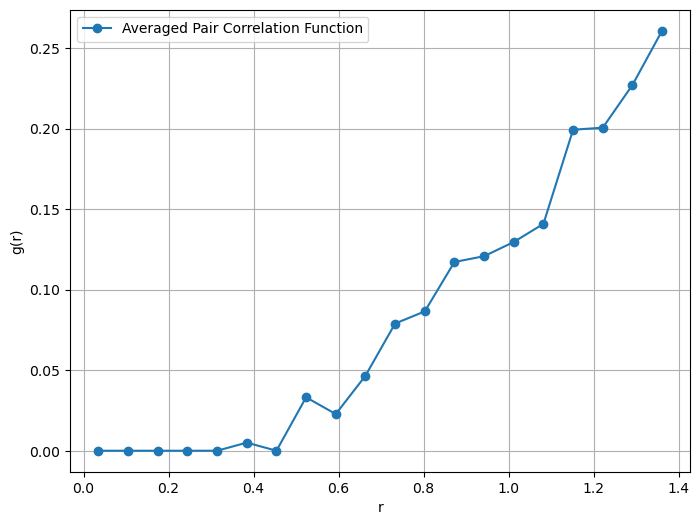

In [257]:
# Compute and average the pair correlation function
all_g_r = []
for config_idx in range(n_configs):
    r, g_r = compute_pair_correlation_supercell(positions_n[config_idx], supercell_vectors, 20)
    
    # Ensure g(r) vanishes at r = 0
   # g_r[0] = 0  # Set the first bin to zero explicitly
    
    all_g_r.append(g_r)

# Average g(r) over all configurations
g_r_avg = np.mean(all_g_r, axis=0)

# Plot the averaged pair correlation function
plt.figure(figsize=(8, 6))
plt.plot(r, g_r_avg, label='Averaged Pair Correlation Function', marker="o")
plt.xlabel('r')
plt.ylabel('g(r)')
plt.grid(True)
plt.legend()
plt.show()

In [108]:
positions.shape

(1, 1024, 8)